09:59:42 - cmdstanpy - INFO - Chain [1] start processing
09:59:42 - cmdstanpy - INFO - Chain [1] done processing


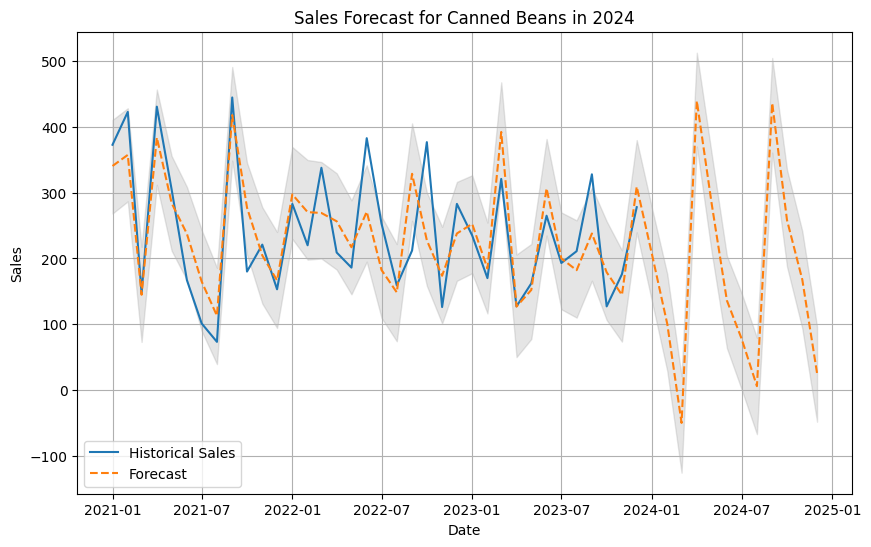

09:59:42 - cmdstanpy - INFO - Chain [1] start processing
09:59:42 - cmdstanpy - INFO - Chain [1] done processing


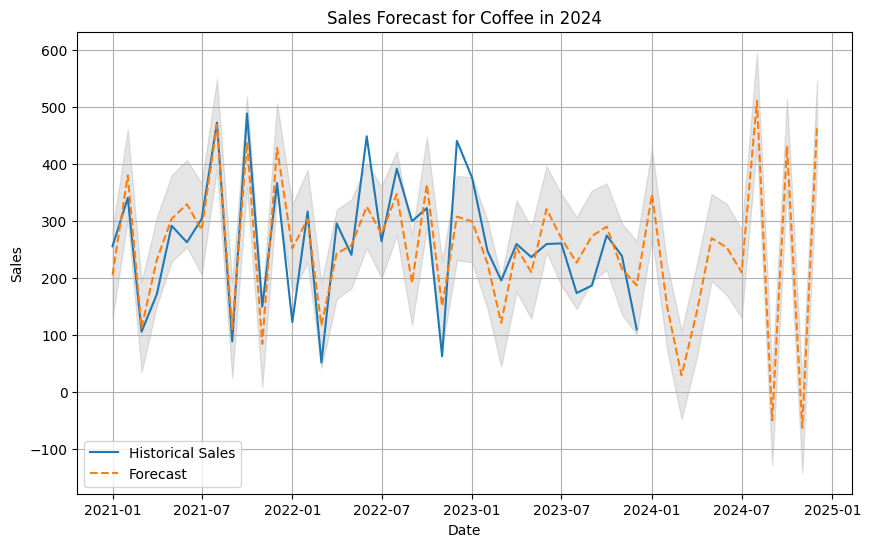

09:59:42 - cmdstanpy - INFO - Chain [1] start processing
09:59:43 - cmdstanpy - INFO - Chain [1] done processing


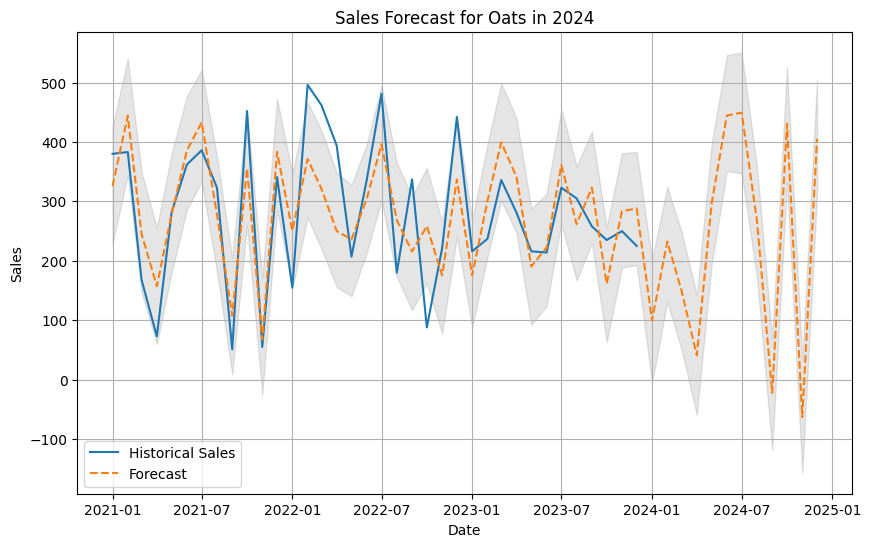

09:59:43 - cmdstanpy - INFO - Chain [1] start processing
09:59:43 - cmdstanpy - INFO - Chain [1] done processing


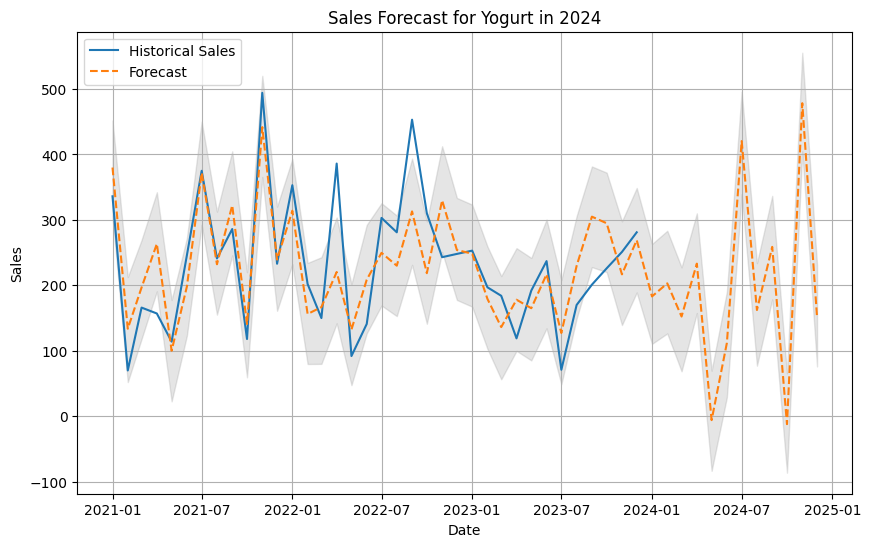

09:59:43 - cmdstanpy - INFO - Chain [1] start processing
09:59:43 - cmdstanpy - INFO - Chain [1] done processing


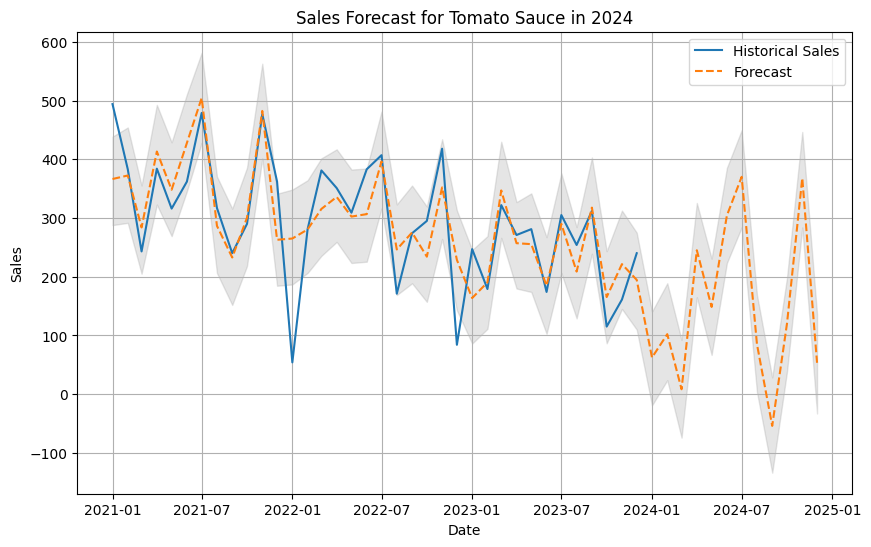

09:59:44 - cmdstanpy - INFO - Chain [1] start processing
09:59:44 - cmdstanpy - INFO - Chain [1] done processing


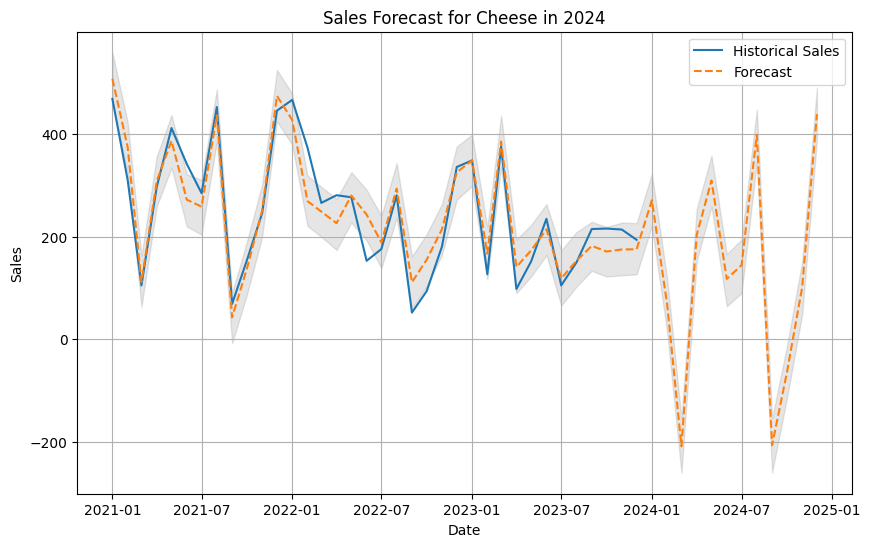

09:59:44 - cmdstanpy - INFO - Chain [1] start processing
09:59:44 - cmdstanpy - INFO - Chain [1] done processing


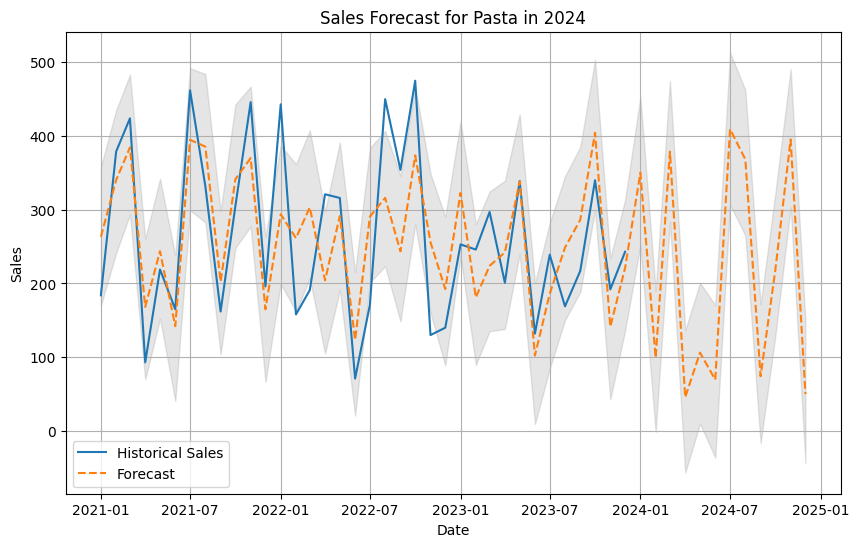

09:59:44 - cmdstanpy - INFO - Chain [1] start processing
09:59:44 - cmdstanpy - INFO - Chain [1] done processing


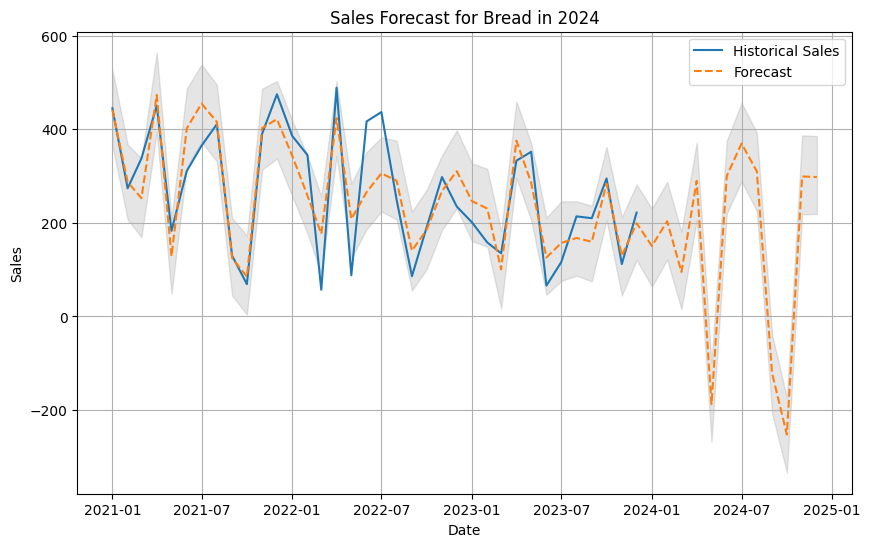

09:59:45 - cmdstanpy - INFO - Chain [1] start processing
09:59:45 - cmdstanpy - INFO - Chain [1] done processing


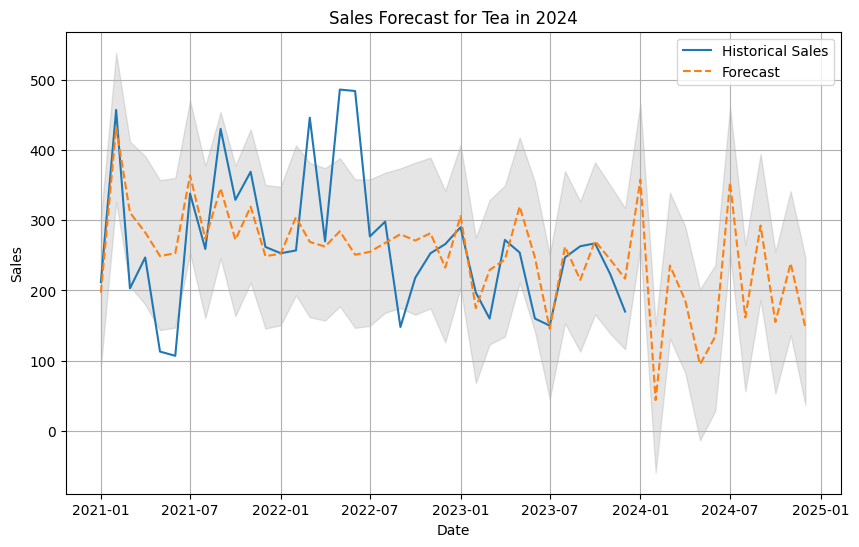

09:59:45 - cmdstanpy - INFO - Chain [1] start processing
09:59:45 - cmdstanpy - INFO - Chain [1] done processing


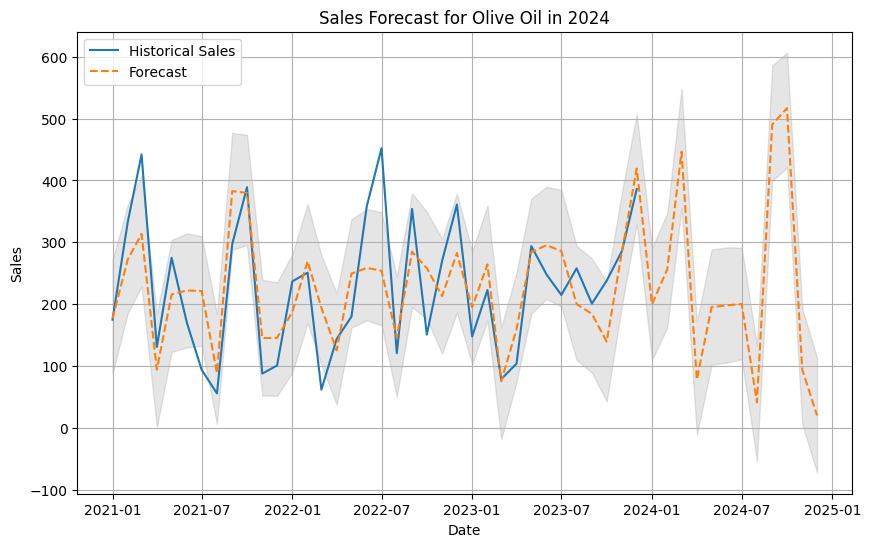

09:59:45 - cmdstanpy - INFO - Chain [1] start processing
09:59:45 - cmdstanpy - INFO - Chain [1] done processing


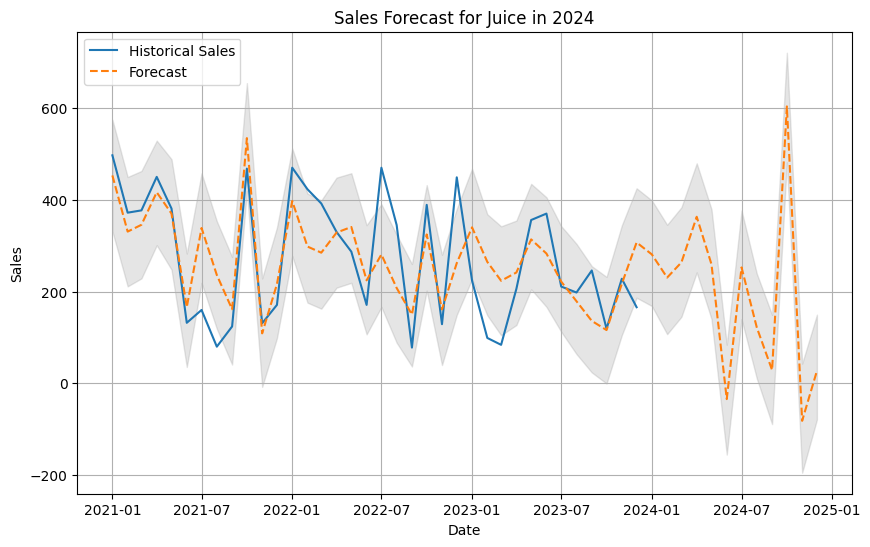

09:59:46 - cmdstanpy - INFO - Chain [1] start processing
09:59:46 - cmdstanpy - INFO - Chain [1] done processing


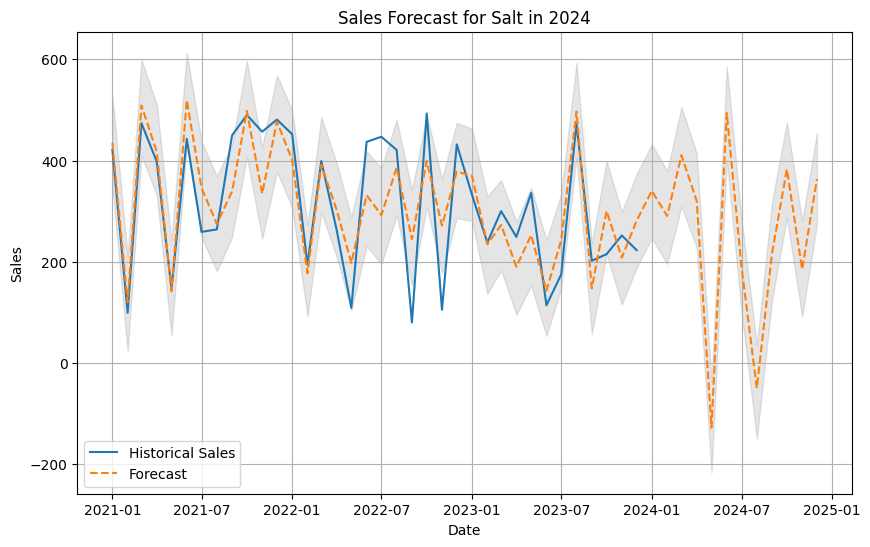

09:59:46 - cmdstanpy - INFO - Chain [1] start processing
09:59:46 - cmdstanpy - INFO - Chain [1] done processing


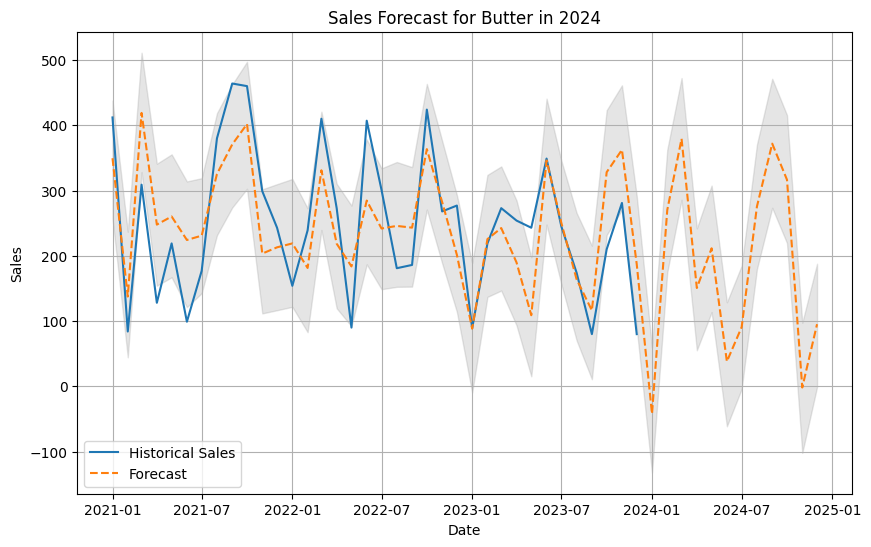

09:59:46 - cmdstanpy - INFO - Chain [1] start processing
09:59:47 - cmdstanpy - INFO - Chain [1] done processing


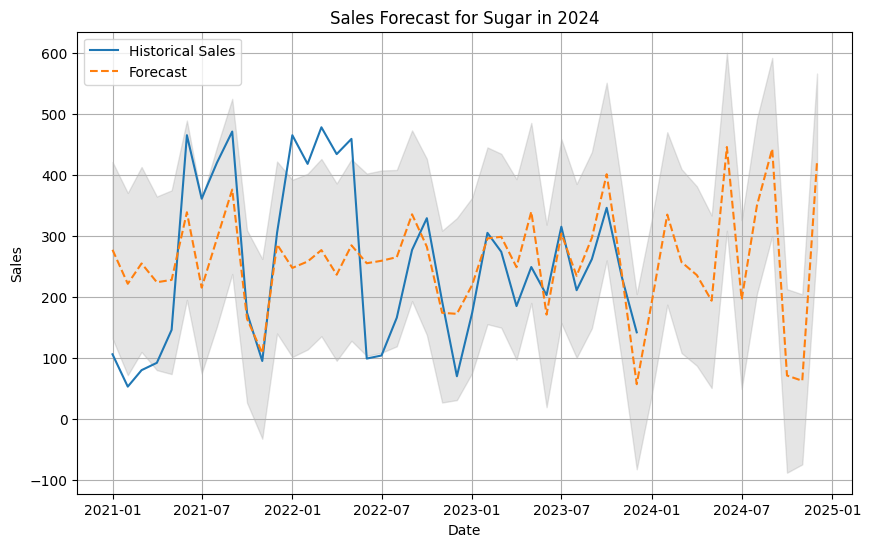

09:59:47 - cmdstanpy - INFO - Chain [1] start processing
09:59:47 - cmdstanpy - INFO - Chain [1] done processing


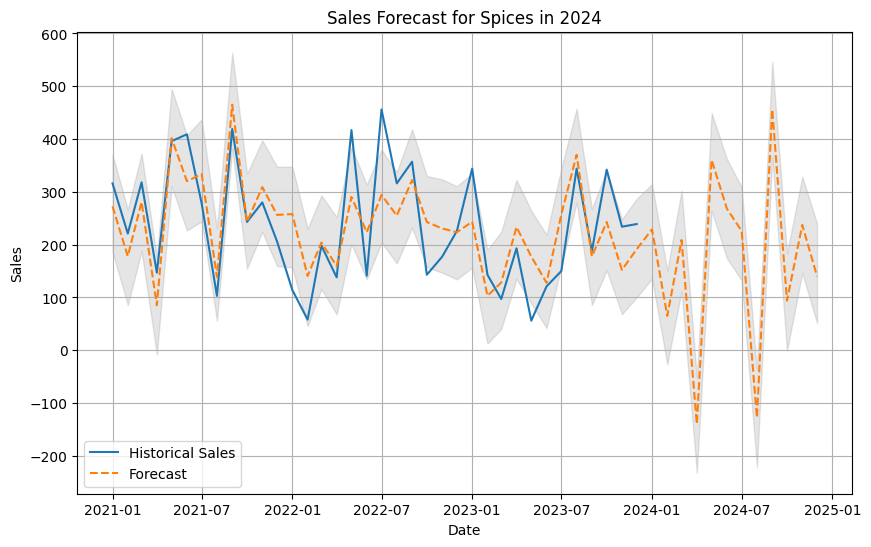

Forecast for product: Canned Beans


,ds,yhat,yhat_lower,yhat_upper
36,2024-01-01,206.106609,134.450830,276.404675
37,2024-02-01,100.189493,28.688170,176.262485
38,2024-03-01,-50.381797,-126.178959,20.788418
39,2024-04-01,439.613227,370.220986,513.091717
40,2024-05-01,283.842015,209.979859,359.863525
41,2024-06-01,135.983509,63.589702,204.066059
42,2024-07-01,77.503973,0.462105,146.924624
43,2024-08-01,5.581385,-67.480029,79.221104
44,2024-09-01,436.197356,361.069403,505.144942
45,2024-10-01,258.332994,187.675219,335.154025


In [7]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load and prepare data
file_path = 'hyperlocal_demand_forecasting_with_grocery_items.xlsx'  # Update path if necessary
data = pd.read_excel(file_path)

# Ensure 'Month' column is datetime type
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data['Product Name'] = data['Product Name'].astype(str)  # Use 'Product Name' as identifier

# Forecast each product's sales
product_forecasts = {}

# Get unique product names
products = data['Product Name'].unique()

for product in products:
    # Filter data for each product
    product_data = data[data['Product Name'] == product]
    
    # Aggregate monthly sales
    monthly_demand = product_data.groupby('Month')['Monthly_Sales'].sum().reset_index()
    monthly_demand.columns = ['ds', 'y']
    
    # Initialize and train Prophet model
    model = Prophet()
    model.fit(monthly_demand)
    
    # Make future dataframe for 12 months of 2024
    future_dates = model.make_future_dataframe(periods=12, freq='MS')
    forecast = model.predict(future_dates)
    
    # Filter forecast data for 2024
    forecast_2024 = forecast[forecast['ds'].dt.year == 2024][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    
    # Store forecast data for the product
    product_forecasts[product] = forecast_2024
    
    # Plot forecast for the product (optional)
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_demand['ds'], monthly_demand['y'], label='Historical Sales')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', linestyle='--')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
    plt.title(f'Sales Forecast for {product} in 2024')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid()
    plt.show()

# Output example forecast data for one product
print("Forecast for product:", products[0])
product_forecasts[products[0]]
